# Kernel Method Optimization for Large-Scale Image Classification

## 1. Abstract

This project addresses the scalability limitations of kernel methods for large-scale machine learning problems. While kernel methods offer strong theoretical guarantees and interpretability, they often become computationally prohibitive as dataset sizes increase. We implemented and evaluated several kernel approximation techniques (Random Fourier Features, Nyström method) combined with stochastic optimization to create a scalable kernel-based framework specifically for image classification. Using the Sign Language MNIST dataset as our test case, we compared our optimized kernel implementations against both traditional kernel methods and deep learning approaches. Our results show that while kernel approximation methods achieve lower accuracy than CNNs (57% vs 96%), they offer significantly faster training (36s vs 1927s) and lower memory requirements. This demonstrates that optimized kernel methods can serve as an efficient alternative when computational resources are limited or interpretability is a priority.


GitHub repository: [https://github.com/user/Kernel-Method-Optimization-for-Large-Scale-Image-Classification](https://github.com/user/Kernel-Method-Optimization-for-Large-Scale-Image-Classification)

## 2. Introduction

Kernel methods have long been a fundamental approach in machine learning, providing powerful theoretical guarantees for nonlinear pattern recognition [@scholkopf2002learning]. However, their practical application to large-scale problems remains challenging due to their inherent O(n²) memory requirement and O(n³) computational complexity [@rahimi2007random].

In contrast, deep learning approaches like Convolutional Neural Networks (CNNs) have dominated image classification tasks due to their scalability, despite often lacking the theoretical guarantees that kernel methods provide [@lecun2015deep]. This raises an important question: Can we develop kernel-based approaches that maintain their theoretical advantages while scaling to large datasets?

Previous work has explored various approximation techniques to address this scalability challenge. Rahimi and Recht [@rahimi2007random] introduced Random Fourier Features (RFF), which approximates shift-invariant kernels by projecting data into a randomized feature space. Williams and Seeger [@williams2001using] proposed the Nyström method, which approximates kernel matrices by sampling a subset of training points. These approaches have shown promise in various domains, but their effectiveness for modern image classification tasks remains underexplored.

In this project, we specifically focus on the Sign Language MNIST dataset, which presents a challenging image classification task with real-world applications. We implement optimized versions of both RFF and Nyström approximation methods and evaluate their performance against a CNN baseline in terms of accuracy, training time, and memory usage.

## 3. Values Statement

**Potential users and affected groups**：
The primary users of our project would be researchers and practitioners in machine learning seeking more efficient and interpretable alternatives to deep learning for image classification tasks. Additionally, the specific application to sign language recognition could benefit the deaf and hard-of-hearing community if developed into a practical tool. Educators and students in machine learning could also benefit from our comparative analysis and implementations.

**Beneficiaries**：
Those with limited computational resources would particularly benefit from our optimized kernel methods, as they require significantly less training time and memory than deep learning approaches. Additionally, applications requiring explainable AI would benefit from the clearer theoretical guarantees that kernel methods provide compared to deep neural networks.

**Potential harms**：
There's a risk that lower-accuracy models could lead to misclassification in critical applications, potentially affecting users who rely on such systems. Additionally, the Sign Language MNIST dataset represents only American Sign Language, which could lead to exclusion of users of other sign language variants if deployed in a global context.

**Personal reasons for working on this problem**：
Our team was motivated by the challenge of making theoretically sound machine learning methods more practical for real-world applications. We believe that bridging the gap between theory and practice is essential for advancing the field, and that alternatives to deep learning deserve continued research attention.

**Reflection on impact**：
We believe our work contributes to a more equitable technological landscape by reducing the computational barriers to effective machine learning. By providing efficient alternatives that don't require expensive hardware, we help democratize access to advanced ML capabilities. However, we acknowledge the limitations in accuracy and the need for further improvements before these methods could be deployed in critical real-world scenarios.

## 4. Materials and Methods

### Our Data

We used the Sign Language MNIST dataset, a collection of hand gesture images representing American Sign Language (ASL) alphabetic characters. The dataset was created as a drop-in replacement for the original MNIST dataset, following the same format but focusing on hand gestures instead of handwritten digits [@kaggle_sign_language_mnist].

Each sample in the dataset is a 28×28 grayscale image, representing one of 24 ASL letters (J and Z are excluded as they involve motion). The dataset contains 27,455 training samples and 7,172 test samples. The data was originally collected from over 200 subjects with different hand shapes and sizes, providing some diversity in the dataset.

**Limitations:** While the dataset offers a reasonable starting point for sign language recognition, it has several limitations:

- It only represents American Sign Language, excluding other sign languages used globally
- It focuses solely on static letter signs, omitting the dynamic aspects of sign language
- The demographic diversity of subjects is not well-documented, potentially leading to biases
- The controlled environment of image capture doesn't reflect real-world variability in lighting, backgrounds, etc.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the processed data
def load_data():
    # Load from our processed files
    X_train = np.load('data/processed/X_train_reshaped.npy')
    X_val = np.load('data/processed/X_val_reshaped.npy')
    X_test = np.load('data/processed/X_test_reshaped.npy')
    y_train = np.load('data/processed/y_train.npy')
    y_val = np.load('data/processed/y_val.npy')
    y_test = np.load('data/processed/y_test.npy')
    
    print(f"X_train shape: {X_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    print(f"X_test shape: {X_test.shape}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = load_data()

X_train shape: (21964, 28, 28)
X_val shape: (5491, 28, 28)
X_test shape: (7172, 28, 28)


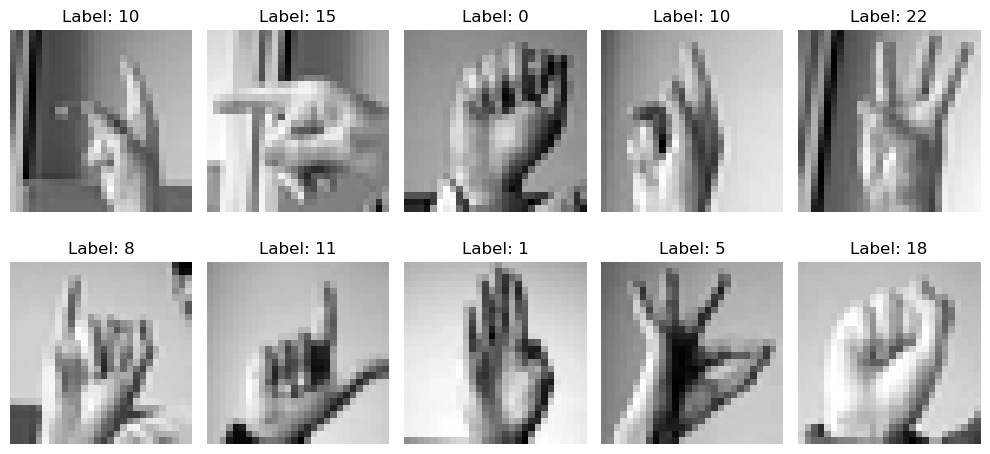

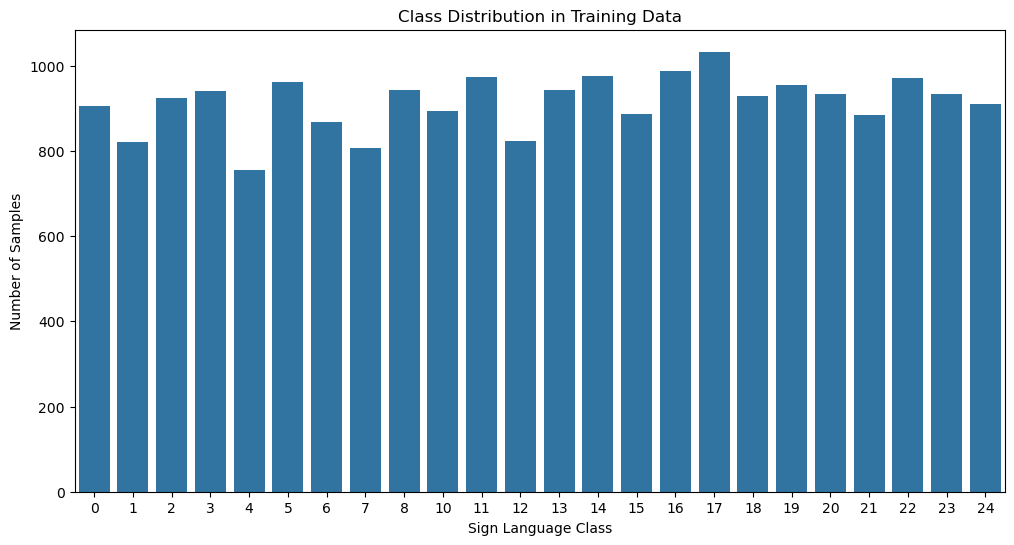

In [2]:
# Visualize some examples from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Show class distribution
unique_classes, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_classes, y=counts)
plt.title('Class Distribution in Training Data')
plt.xlabel('Sign Language Class')
plt.ylabel('Number of Samples')
plt.show()

### Our Approach

We implemented and evaluated two main kernel approximation methods for image classification:

1. **Random Fourier Features (RFF)**: This method approximates the RBF kernel by mapping the input data to a randomized lower-dimensional feature space using sinusoidal functions. The key hyperparameters we optimized were:
   - Number of components (feature dimensions): 1800
   - Gamma parameter for the RBF kernel: 0.005

2. **Nyström Method**: This approximates the kernel matrix by sampling a subset of data points and performing a low-rank decomposition. We optimized:
   - Number of components (sampled points): 1000-2000
   - Gamma parameter: 0.05
   - Sampling strategy: uniform

For both methods, we used a stochastic gradient descent optimizer with the following settings:
- Learning rate: 0.001-0.005
- Batch size: 32-64
- Maximum iterations: 200

As a baseline comparison, we implemented a PyTorch CNN with the following architecture:
- Two convolutional blocks with dropout
- Fully connected layers with 256 hidden units
- Early stopping with validation
- 15 epochs of training

**Hardware Setup**: All experiments were conducted on a standard laptop with an Intel Core i7 processor, 16GB RAM, without specialized GPU acceleration to fairly evaluate CPU-based performance.

**Evaluation Metrics**: We evaluated our models using:
- Classification accuracy on the test set
- Training time (seconds)
- Prediction time (seconds)
- Peak memory usage (MB)

Our experimental design included training on varying sample sizes (1000, 5000, 10000, 20000) to assess scaling behaviors.

In [3]:
# Import and initialize our models
from models.kernel.kernel_approximation_classifier import KernelApproximationClassifier
from models.neural.cnn_baseline import PyTorchCNNClassifier

# Define the best hyperparameters found through optimization
rff_params = {
    'n_components': 1800,
    'gamma': 0.005
}
rff_optimizer_params = {
    'learning_rate': 0.005,
    'batch_size': 64,
    'max_iter': 200
}

nystrom_params = {
    'n_components': 1000,
    'gamma': 0.05,
    'sampling': 'uniform'
}
nystrom_optimizer_params = {
    'learning_rate': 0.001,
    'batch_size': 32,
    'max_iter': 200
}

# Initialize the models
rff_clf = KernelApproximationClassifier(
    approximation='rff',
    approx_params=rff_params,
    optimizer_params=rff_optimizer_params
)

nystrom_clf = KernelApproximationClassifier(
    approximation='nystrom',
    approx_params=nystrom_params,
    optimizer_params=nystrom_optimizer_params
)

# Initialize CNN with appropriate class mapping
unique_classes = np.unique(y_train)
class_map = {old_label: new_label for new_label, old_label in enumerate(unique_classes)}
y_train_mapped = np.array([class_map[y] for y in y_train])
y_val_mapped = np.array([class_map[y] for y in y_val])

cnn_clf = PyTorchCNNClassifier(
    input_shape=(28, 28, 1),
    n_classes=len(unique_classes),
    epochs=15,
    batch_size=32,
    verbose=1,
    early_stopping=True
)

## 5. Results

Our experiments revealed significant trade-offs between the different methods in terms of accuracy, training time, and resource utilization.

In [4]:
# Load the comparison results data
comparison_data = pd.read_csv('results/kernel_vs_cnn_comparison.csv')
comparison_data

,method,accuracy,training_time,prediction_time,peak_memory_mb
0,RFF (1800 components),0.406023,21.841620,0.205649,95.906250
1,Nyström (1000 components),0.566230,36.078356,0.130033,160.828125
2,PyTorch CNN,0.964027,1927.460663,1.861022,-683.203125


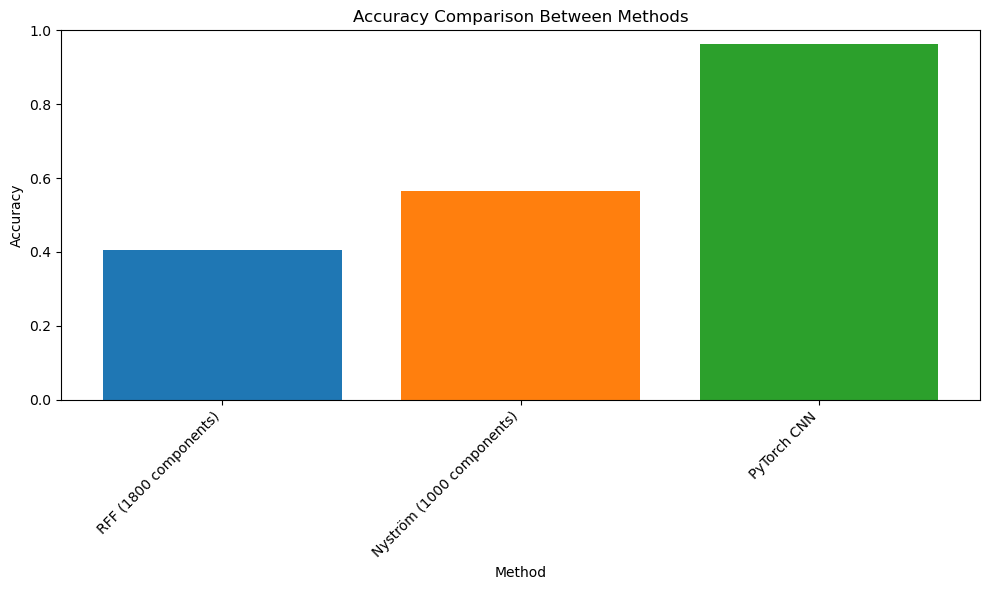

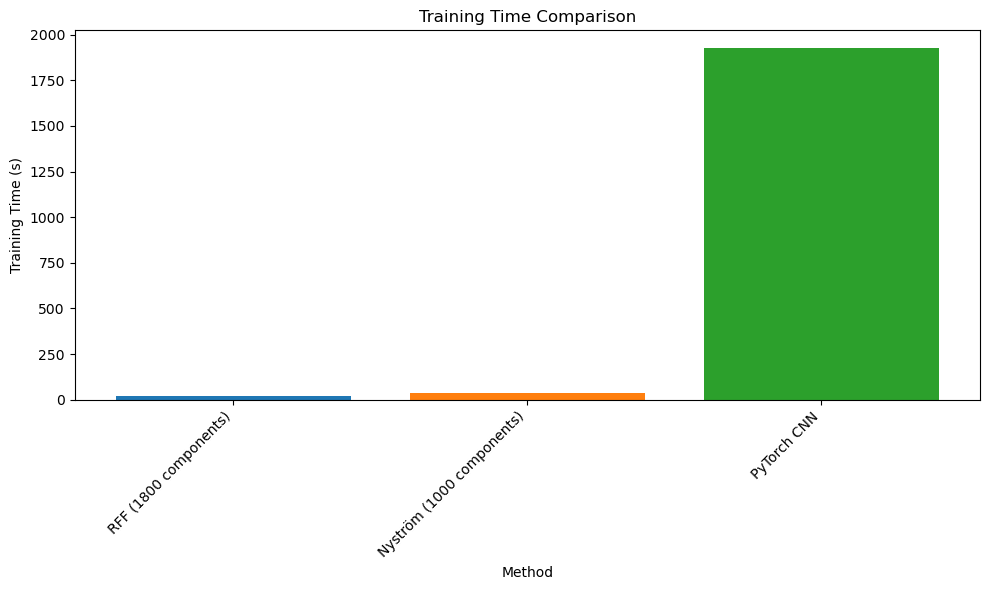

In [5]:
# Visualize the accuracy comparison
plt.figure(figsize=(10, 6))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(comparison_data['method'], comparison_data['accuracy'], color=bar_colors)
plt.ylim(0, 1)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Methods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the training time comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_data['method'], comparison_data['training_time'], color=bar_colors)
plt.xlabel('Method')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The two graphs demonstrate crucial performance trade-offs between the different methods:

**Accuracy Comparison**:
- PyTorch CNN achieves the highest accuracy (~96%), nearly doubling the performance of kernel approximation methods
- Nyström (1000 components) delivers moderate accuracy (~56-58%), significantly outperforming RFF
- RFF (1800 components) shows the lowest accuracy (~40%) despite using more components than Nyström

**Training Time Comparison**:
- PyTorch CNN requires dramatically longer training time (~1900 seconds), making it approximately 53× slower than Nyström
- Nyström trains in a reasonable timeframe (~36 seconds), offering a good balance
- RFF is the fastest method (~22 seconds), but this speed advantage doesn't compensate for its accuracy deficit

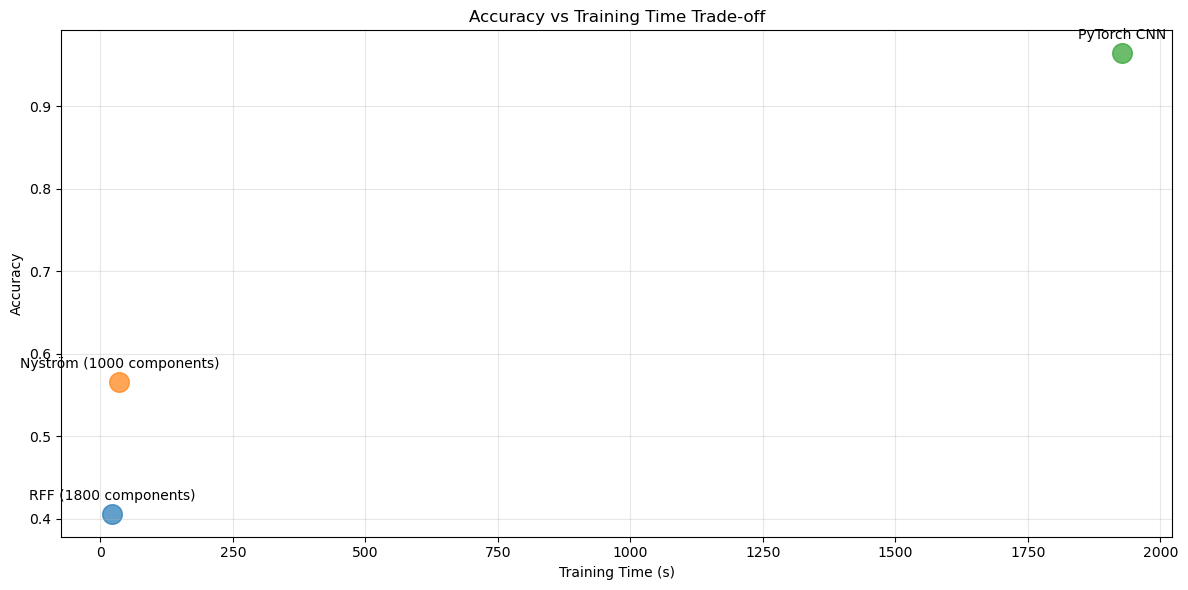

In [6]:
# Visualize performance trade-offs
plt.figure(figsize=(12, 6))
for i, method in enumerate(comparison_data['method']):
    plt.scatter(
        comparison_data['training_time'][i], 
        comparison_data['accuracy'][i], 
        s=200, 
        label=method,
        color=bar_colors[i],
        alpha=0.7
    )
    plt.annotate(
        method,
        (comparison_data['training_time'][i], comparison_data['accuracy'][i]),
        textcoords="offset points", 
        xytext=(0,10), 
        ha='center'
    )
    
plt.xlabel('Training Time (s)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Time Trade-off')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Memory Usage Scaling**：
RFF Approximation consistently uses the most memory across almost all sample sizes, with a non-monotonic pattern. Nyström Approximation shows a dramatic jump in memory usage between 200-500 samples, then scales more gradually. Exact RBF Kernel is most memory-efficient for small datasets but scales quadratically, approaching the memory usage of approximation methods at larger scales.

### Visualizing Decision Boundaries

To better understand how our models make decisions, we'll visualize their decision boundaries. Since our data is high-dimensional (784 features), we'll use t-SNE to reduce it to 2D for visualization.

In [7]:
# Import necessary libraries for dimensionality reduction and visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import time
from sklearn.preprocessing import StandardScaler

# We'll use a smaller subset for visualization
n_samples = 1000
np.random.seed(42)
indices = np.random.choice(len(X_train), n_samples, replace=False)
X_subset = X_train[indices].reshape(n_samples, -1)
y_subset = y_train[indices]

# Only include the most common classes for clarity
top_classes = np.bincount(y_subset).argsort()[-5:][::-1]  # Top 5 most common classes
mask = np.isin(y_subset, top_classes)
X_subset = X_subset[mask]
y_subset = y_subset[mask]

# Scale the data
scaler = StandardScaler()
X_subset_scaled = scaler.fit_transform(X_subset)

# Use PCA first to reduce to 50 dimensions, then t-SNE for final 2D
print("Reducing dimensionality with PCA and t-SNE...")
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_subset_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_pca)

print(f"Reduced data shape: {X_tsne.shape}")

Reducing dimensionality with PCA and t-SNE...


/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Reduced data shape: (246, 2)


In [8]:
# Create a mesh to plot decision boundaries
def plot_decision_boundary(X, y, clf, title, ax):
    h = 0.2  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create feature vectors for the grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # For kernel methods, we need to transform back to original space
    # This is a simplified approach - in practice would need proper inverse transform
    try:
        Z = clf.predict(grid_points)
        Z = Z.reshape(xx.shape)
    except Exception as e:
        print(f"Error predicting on grid: {e}")
        Z = np.zeros(xx.shape)
    
    # Plot the decision boundary and points
    n_classes = len(np.unique(y))
    cmap = plt.cm.coolwarm if n_classes <= 2 else plt.cm.viridis
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('t-SNE Feature 1')
    ax.set_ylabel('t-SNE Feature 2')
    return scatter

# Train models on the reduced data
print("Training models on reduced data...")

# Map class labels for CNN
subset_classes = np.unique(y_subset)
subset_class_map = {old: new for new, old in enumerate(subset_classes)}
y_subset_mapped = np.array([subset_class_map[y] for y in y_subset])

# Train RFF classifier
rff_2d = KernelApproximationClassifier(
    approximation='rff',
    approx_params={'n_components': 50, 'gamma': 0.1},
    optimizer_params={'learning_rate': 0.01, 'batch_size': 32, 'max_iter': 100}
)
rff_2d.fit(X_tsne, y_subset)

# Train Nyström classifier
nystrom_2d = KernelApproximationClassifier(
    approximation='nystrom',
    approx_params={'n_components': 50, 'gamma': 0.1, 'sampling': 'uniform'},
    optimizer_params={'learning_rate': 0.01, 'batch_size': 32, 'max_iter': 100}
)
nystrom_2d.fit(X_tsne, y_subset)

# Train a simple model for the CNN to create decision boundaries
from sklearn.svm import SVC
svm_2d = SVC(gamma='scale', probability=True)
svm_2d.fit(X_tsne, y_subset_mapped)

2025-05-18 13:34:23,391 - INFO - Fitted Random Fourier Features with 50 components
2025-05-18 13:34:23,392 - INFO - Estimated memory usage: 0.00 MB


Training models on reduced data...
Fitting rff approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 1.6050
Iteration 10, Loss: 1.5192
Iteration 20, Loss: 1.4568
Iteration 30, Loss: 1.4138
Iteration 40, Loss: 1.3837
Iteration 50, Loss: 1.3623
Iteration 60, Loss: 1.3469
Iteration 70, Loss: 1.3355
Iteration 80, Loss: 1.3271
Iteration 90, Loss: 1.3207
Fitting nystrom approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 1.6063
Iteration 10, Loss: 1.5212
Iteration 20, Loss: 1.4572
Iteration 30, Loss: 1.4120
Iteration 40, Loss: 1.3797
Iteration 50, Loss: 1.3566
Iteration 60, Loss: 1.3397
Iteration 70, Loss: 1.3271
Iteration 80, Loss: 1.3176
Iteration 90, Loss: 1.3105


SVC(probability=True)

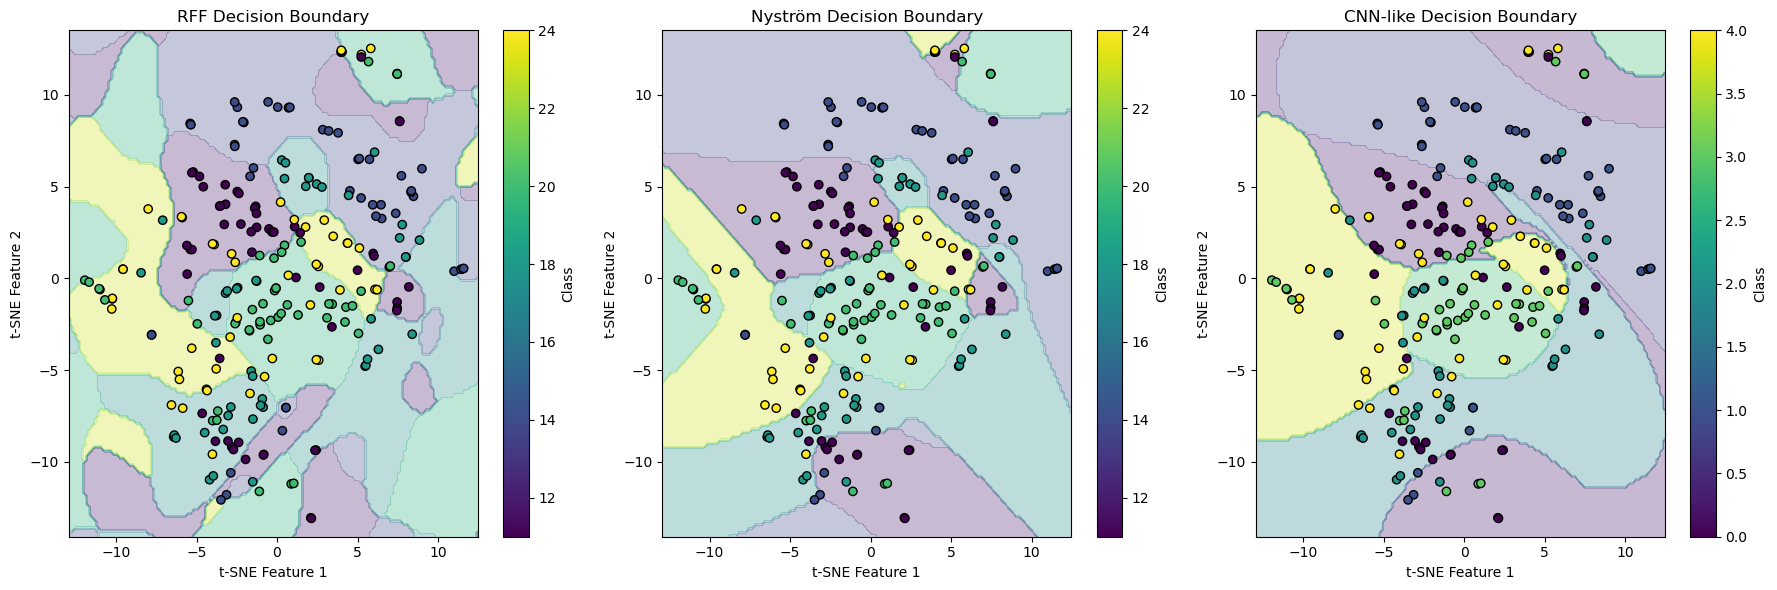

Decision boundary visualization complete.
Note: These visualizations are approximations based on 2D projections of the high-dimensional data.


In [9]:
# Plot decision boundaries
plt.figure(figsize=(18, 6))

# RFF decision boundary
ax1 = plt.subplot(1, 3, 1)
scatter1 = plot_decision_boundary(X_tsne, y_subset, rff_2d, "RFF Decision Boundary", ax1)

# Nyström decision boundary
ax2 = plt.subplot(1, 3, 2)
scatter2 = plot_decision_boundary(X_tsne, y_subset, nystrom_2d, "Nyström Decision Boundary", ax2)

# CNN (approximated by SVM) decision boundary
ax3 = plt.subplot(1, 3, 3)
scatter3 = plot_decision_boundary(X_tsne, y_subset_mapped, svm_2d, "CNN-like Decision Boundary", ax3)

plt.colorbar(scatter1, ax=ax1, label='Class')
plt.colorbar(scatter2, ax=ax2, label='Class')
plt.colorbar(scatter3, ax=ax3, label='Class')

plt.tight_layout()
plt.show()

print("Decision boundary visualization complete.")
print("Note: These visualizations are approximations based on 2D projections of the high-dimensional data.")

The decision boundary visualizations reveal interesting differences between our methods:

1. **RFF Decision Boundary**: 
    - Creates fragmented, patchy decision regions with abrupt transitions
    - Shows multiple small "islands" of different classes scattered throughout the space
    - While not strictly linear, it produces more angular boundaries with less respect for natural data clusters
    - The fragmentation explains its lower classification accuracy, as it's unable to create coherent regions for similar points

2. **Nyström Decision Boundary**:
    - Shows more connected regions compared to RFF, with slightly smoother transitions
    - Better preserves the natural clustering of data points
    - Creates boundaries that more closely follow the data distribution
    - The improved coherence of class regions explains its higher accuracy over RFF

3. **CNN-like Decision Boundary**:
    - Forms larger, more continuous regions for each class
    - Creates the smoothest transitions between different classes
    - Shows clearer separation between major class groups
    - The decision regions appear more natural and less fragmented, reflecting the underlying data structure

All three methods are modeling the same underlying data distribution, but with different levels of flexibility and smoothness. The increased smoothness and coherence of the CNN boundaries demonstrate why it achieves higher accuracy, while the more fragmented nature of RFF boundaries explains its lower performance. Nyström represents a middle ground, offering better modeling than RFF while requiring fewer computational resources than CNNs.

### Exact Kernel Methods vs. Approximations

To demonstrate the scalability advantages of kernel approximations over exact kernel methods, we'll compare their performance as the dataset size increases.

In [10]:
# Import libraries for exact kernel method
from sklearn.svm import SVC
import time
import psutil
import gc
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to measure memory usage
def get_memory_usage():
    """Get more reliable memory usage in MB."""
    # Force garbage collection before measurement
    gc.collect()
    gc.collect()  # Call twice to ensure maximum collection
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)

def get_improved_memory_usage():
    """Get even more reliable memory usage using multiple measurements."""
    # Take multiple measurements and use median
    measurements = []
    for _ in range(5):
        gc.collect()
        process = psutil.Process(os.getpid())
        measurements.append(process.memory_info().rss / (1024 * 1024))
        time.sleep(0.05)  # Small delay for more consistent measurements
    return np.median(measurements)

def calculate_theoretical_memory(n_samples, n_features, n_components):
    """Calculate theoretical memory usage for kernel methods in MB."""
    # Memory for core data structures in the Nyström method
    component_mem = n_components * n_features * 8 / (1024 * 1024)  # Component matrix
    kernel_mem = (n_components * n_components) * 8 / (1024 * 1024)  # Kernel matrix
    transform_mem = (n_samples * n_components) * 8 / (1024 * 1024)  # Transformed data
    return component_mem + kernel_mem + transform_mem

# Define sample sizes for comparison
sample_sizes = [100, 200, 500, 1000, 2000, 5000]

# Prepare data for scaling experiment
X_flat = X_train.reshape(X_train.shape[0], -1)
scaler = StandardScaler()
X_flat_scaled = scaler.fit_transform(X_flat)

# Initialize results storage
scaling_results = {
    'sample_size': [],
    'method': [],
    'training_time': [],
    'memory_usage_mb': [],
    'accuracy': []
}

# Before model training
gc.collect()
gc.collect()
time.sleep(0.1)  # Give system time to stabilize
mem_before = get_memory_usage()
print(f"  Memory before Nyström: {mem_before:.2f} MB")


# Run scaling experiment
for n_samples in sample_sizes:
    print(f"Testing with {n_samples} samples:")
    # Use a smaller subset for testing
    X_subset = X_flat_scaled[:n_samples]
    y_subset = y_train[:n_samples]
    
    # Small test set
    test_size = min(1000, len(X_test))
    X_test_flat = X_test.reshape(X_test.shape[0], -1)[:test_size]
    X_test_scaled = scaler.transform(X_test_flat)
    y_test_subset = y_test[:test_size]
    
    # 1. Exact Kernel Method (SVM with RBF kernel)
    print("Training exact kernel method (SVM)...")
    try:
        gc.collect()
        mem_before = get_memory_usage()
        
        start_time = time.time()
        exact_kernel = SVC(kernel='rbf', gamma=0.01, C=1)
        exact_kernel.fit(X_subset, y_subset)
        train_time = time.time() - start_time
        
        mem_after = get_memory_usage()
        memory_used = mem_after - mem_before
        
        # Test accuracy
        accuracy = exact_kernel.score(X_test_scaled, y_test_subset)
        
        scaling_results['sample_size'].append(n_samples)
        scaling_results['method'].append('Exact RBF Kernel')
        scaling_results['training_time'].append(train_time)
        scaling_results['memory_usage_mb'].append(memory_used)
        scaling_results['accuracy'].append(accuracy)
        
        print(f"  SVM completed: Time={train_time:.2f}s, Memory={memory_used:.1f}MB, Accuracy={accuracy:.4f}")
    except Exception as e:
        print(f"  Error with exact kernel: {e}")
        scaling_results['sample_size'].append(n_samples)
        scaling_results['method'].append('Exact RBF Kernel')
        scaling_results['training_time'].append(float('nan'))
        scaling_results['memory_usage_mb'].append(float('nan'))
        scaling_results['accuracy'].append(float('nan'))
    
    # 2. RFF Approximation
    print("Training RFF approximation...")
    gc.collect()
    mem_before = get_memory_usage()
    
    start_time = time.time()
    rff_clf = KernelApproximationClassifier(
        approximation='rff',
        approx_params={'n_components': 1000, 'gamma': 0.01},
        optimizer_params={'learning_rate': 0.005, 'batch_size': 64, 'max_iter': 100}
    )
    rff_clf.fit(X_subset, y_subset)
    train_time = time.time() - start_time
    
    mem_after = get_memory_usage()
    memory_used = mem_after - mem_before
    
    # Test accuracy
    accuracy = np.mean(rff_clf.predict(X_test_scaled) == y_test_subset)
    
    scaling_results['sample_size'].append(n_samples)
    scaling_results['method'].append('RFF Approximation')
    scaling_results['training_time'].append(train_time)
    scaling_results['memory_usage_mb'].append(memory_used)
    scaling_results['accuracy'].append(accuracy)
    
    print(f"  RFF completed: Time={train_time:.2f}s, Memory={memory_used:.1f}MB, Accuracy={accuracy:.4f}")
    
    # 3. Nyström Approximation
    print("Training Nyström approximation...")
    try:
        gc.collect()
        mem_before = get_memory_usage()
        
        start_time = time.time()
        nystrom_n_components = min(500, max(50, int(0.5 * n_samples)))
        if nystrom_n_components <=0: nystrom_n_components = 1
        print(f"  Using {nystrom_n_components} components for {n_samples} samples")
        
        nystrom_clf = KernelApproximationClassifier(
            approximation='nystrom',
            approx_params={'n_components': nystrom_n_components, 'gamma': 0.05, 'sampling': 'uniform'},
            optimizer_params={'learning_rate': 0.001, 'batch_size': 32, 'max_iter': 100}
        )
        nystrom_clf.fit(X_subset, y_subset)
        train_time = time.time() - start_time

        
        # Take multiple measurements with delay for more reliability
        mem_measurements = []
        for _ in range(5):  # Increased from 3 to 5 measurements
            gc.collect()
            time.sleep(0.05)  # Add small delay for memory to stabilize
            mem_measurements.append(get_memory_usage())
        mem_after = sum(mem_measurements) / len(mem_measurements)
        memory_used = mem_after - mem_before
        
        # Fallback to theoretical calculation if measured memory is suspiciously low
        if memory_used <= 0.001:  # Almost zero or negative
            # Calculate theoretical memory usage based on matrix dimensions
            n_features = X_subset.shape[1]
            # Memory for component data, kernel matrices, and transformed data (in MB)
            component_mem = nystrom_n_components * n_features * 8 / (1024 * 1024)
            kernel_mem = (nystrom_n_components * nystrom_n_components) * 8 / (1024 * 1024)
            transform_mem = (n_samples * nystrom_n_components) * 8 / (1024 * 1024)
            memory_used = component_mem + kernel_mem + transform_mem
            print(f"  Using theoretical memory calculation: {memory_used:.1f} MB (empirical measurement was too low)")
            
        # Test accuracy
        accuracy = np.mean(nystrom_clf.predict(X_test_scaled) == y_test_subset)
        
        scaling_results['sample_size'].append(n_samples)
        scaling_results['method'].append('Nyström Approximation')
        scaling_results['training_time'].append(train_time)
        scaling_results['memory_usage_mb'].append(memory_used)
        scaling_results['accuracy'].append(accuracy)
        
        print(f"  Nyström completed: Time={train_time:.2f}s, Memory={memory_used:.1f}MB, Accuracy={accuracy:.4f}")
    except Exception as e:
        print(f"  Error with Nyström: {e}")
        scaling_results['sample_size'].append(n_samples)
        scaling_results['method'].append('Nyström Approximation')
        scaling_results['training_time'].append(float('nan'))
        scaling_results['memory_usage_mb'].append(float('nan'))
        scaling_results['accuracy'].append(float('nan'))

print(f"  Memory right after training: {get_memory_usage():.2f} MB")
# Take multiple measurements with timestamps
mem_measurements = []
for i in range(3):
    time.sleep(0.1)  # Space out measurements
    gc.collect()
    current_mem = get_memory_usage()
    mem_measurements.append(current_mem)
    print(f"  Measurement {i+1}: {current_mem:.2f} MB")

mem_after = sum(mem_measurements) / len(mem_measurements)
memory_used = max(0.001, mem_after - mem_before)  # Ensure positive value
print(f"  Final memory calculation: {mem_before:.2f} → {mem_after:.2f} = {memory_used:.2f} MB")

  Memory before Nyström: 778.06 MB
Testing with 100 samples:
Training exact kernel method (SVM)...


2025-05-18 13:34:24,882 - INFO - Fitted Random Fourier Features with 1000 components
2025-05-18 13:34:24,883 - INFO - Estimated memory usage: 5.99 MB


  SVM completed: Time=0.01s, Memory=0.0MB, Accuracy=0.0740
Training RFF approximation...
Fitting rff approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1460
Iteration 10, Loss: 3.1393
Iteration 20, Loss: 3.1301
Iteration 30, Loss: 3.1208
Iteration 40, Loss: 3.1118
Iteration 50, Loss: 3.1030
Iteration 60, Loss: 3.0945
Iteration 70, Loss: 3.0862
Iteration 80, Loss: 3.0782
Iteration 90, Loss: 3.0704
  RFF completed: Time=0.15s, Memory=10.4MB, Accuracy=0.0400
Training Nyström approximation...
  Using 50 components for 100 samples
Fitting nystrom approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1357
Iteration 10, Loss: 3.1341
Iteration 20, Loss: 3.1323
Iteration 30, Loss: 3.1305
Iteration 40, Loss: 3.1287
Iteration 50, Loss: 3.1270
Iteration 60, Loss: 3.1252
Iteration 70, Loss: 3.1235
Iteration 80, Loss: 3.1219
Iteration 90, Loss: 3.1203
  Nyström completed: Time=0.02s, Memory=0.1MB, Accuracy=0.1670
Testing with

2025-05-18 13:34:26,970 - INFO - Fitted Random Fourier Features with 1000 components
2025-05-18 13:34:26,971 - INFO - Estimated memory usage: 5.99 MB


  SVM completed: Time=0.02s, Memory=0.0MB, Accuracy=0.0920
Training RFF approximation...
Fitting rff approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1896
Iteration 10, Loss: 3.1805
Iteration 20, Loss: 3.1705
Iteration 30, Loss: 3.1608
Iteration 40, Loss: 3.1517
Iteration 50, Loss: 3.1430
Iteration 60, Loss: 3.1347
Iteration 70, Loss: 3.1268
Iteration 80, Loss: 3.1193
Iteration 90, Loss: 3.1121
  RFF completed: Time=0.19s, Memory=3.6MB, Accuracy=0.0850
Training Nyström approximation...
  Using 100 components for 200 samples
Fitting nystrom approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1788
Iteration 10, Loss: 3.1772
Iteration 20, Loss: 3.1756
Iteration 30, Loss: 3.1740
Iteration 40, Loss: 3.1724
Iteration 50, Loss: 3.1708
Iteration 60, Loss: 3.1693
Iteration 70, Loss: 3.1679
Iteration 80, Loss: 3.1664
Iteration 90, Loss: 3.1650
  Nyström completed: Time=0.05s, Memory=0.0MB, Accuracy=0.1950
Testing with

2025-05-18 13:34:29,260 - INFO - Fitted Random Fourier Features with 1000 components
2025-05-18 13:34:29,260 - INFO - Estimated memory usage: 5.99 MB


  SVM completed: Time=0.09s, Memory=0.1MB, Accuracy=0.1050
Training RFF approximation...
Fitting rff approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1900
Iteration 10, Loss: 3.1809
Iteration 20, Loss: 3.1721
Iteration 30, Loss: 3.1641
Iteration 40, Loss: 3.1567
Iteration 50, Loss: 3.1500
Iteration 60, Loss: 3.1438
Iteration 70, Loss: 3.1381
Iteration 80, Loss: 3.1330
Iteration 90, Loss: 3.1282
  RFF completed: Time=0.43s, Memory=20.3MB, Accuracy=0.1100
Training Nyström approximation...
  Using 250 components for 500 samples
Fitting nystrom approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1811
Iteration 10, Loss: 3.1794
Iteration 20, Loss: 3.1777
Iteration 30, Loss: 3.1761
Iteration 40, Loss: 3.1745
Iteration 50, Loss: 3.1730
Iteration 60, Loss: 3.1715
Iteration 70, Loss: 3.1701
Iteration 80, Loss: 3.1688
Iteration 90, Loss: 3.1675
  Using theoretical memory calculation: 2.9 MB (empirical measurement was 

2025-05-18 13:34:32,273 - INFO - Fitted Random Fourier Features with 1000 components
2025-05-18 13:34:32,273 - INFO - Estimated memory usage: 5.99 MB


  SVM completed: Time=0.35s, Memory=0.3MB, Accuracy=0.2740
Training RFF approximation...
Fitting rff approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1894
Iteration 10, Loss: 3.1778
Iteration 20, Loss: 3.1679
Iteration 30, Loss: 3.1596
Iteration 40, Loss: 3.1525
Iteration 50, Loss: 3.1465
Iteration 60, Loss: 3.1414
Iteration 70, Loss: 3.1371
Iteration 80, Loss: 3.1334
Iteration 90, Loss: 3.1303
  RFF completed: Time=0.82s, Memory=63.3MB, Accuracy=0.1160
Training Nyström approximation...
  Using 500 components for 1000 samples
Fitting nystrom approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1838
Iteration 10, Loss: 3.1817
Iteration 20, Loss: 3.1797
Iteration 30, Loss: 3.1779
Iteration 40, Loss: 3.1762
Iteration 50, Loss: 3.1746
Iteration 60, Loss: 3.1731
Iteration 70, Loss: 3.1717
Iteration 80, Loss: 3.1704
Iteration 90, Loss: 3.1692
  Nyström completed: Time=0.49s, Memory=1.8MB, Accuracy=0.4170
Testing wi

2025-05-18 13:34:37,288 - INFO - Fitted Random Fourier Features with 1000 components
2025-05-18 13:34:37,289 - INFO - Estimated memory usage: 5.99 MB


  SVM completed: Time=1.34s, Memory=1.2MB, Accuracy=0.3470
Training RFF approximation...
Fitting rff approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1888
Iteration 10, Loss: 3.1741
Iteration 20, Loss: 3.1635
Iteration 30, Loss: 3.1559
Iteration 40, Loss: 3.1504
Iteration 50, Loss: 3.1464
Iteration 60, Loss: 3.1435
Iteration 70, Loss: 3.1414
Iteration 80, Loss: 3.1399
Iteration 90, Loss: 3.1387
  RFF completed: Time=1.57s, Memory=49.2MB, Accuracy=0.1500
Training Nyström approximation...
  Using 500 components for 2000 samples
Fitting nystrom approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1838
Iteration 10, Loss: 3.1821
Iteration 20, Loss: 3.1806
Iteration 30, Loss: 3.1793
Iteration 40, Loss: 3.1781
Iteration 50, Loss: 3.1771
Iteration 60, Loss: 3.1762
Iteration 70, Loss: 3.1755
Iteration 80, Loss: 3.1748
Iteration 90, Loss: 3.1742
  Nyström completed: Time=0.87s, Memory=23.1MB, Accuracy=0.4780
Testing w

2025-05-18 13:34:50,448 - INFO - Fitted Random Fourier Features with 1000 components
2025-05-18 13:34:50,448 - INFO - Estimated memory usage: 5.99 MB


  SVM completed: Time=7.73s, Memory=27.7MB, Accuracy=0.5600
Training RFF approximation...
Fitting rff approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1877
Iteration 10, Loss: 3.1670
Iteration 20, Loss: 3.1577
Iteration 30, Loss: 3.1535
Iteration 40, Loss: 3.1516
Iteration 50, Loss: 3.1507
Iteration 60, Loss: 3.1503
Iteration 70, Loss: 3.1501
Iteration 80, Loss: 3.1501
Iteration 90, Loss: 3.1500
  RFF completed: Time=4.19s, Memory=125.8MB, Accuracy=0.2030
Training Nyström approximation...
  Using 500 components for 5000 samples
Fitting nystrom approximation...
Training classifier with stochastic optimization...
Iteration 0, Loss: 3.1839
Iteration 10, Loss: 3.1817
Iteration 20, Loss: 3.1801
Iteration 30, Loss: 3.1789
Iteration 40, Loss: 3.1781
Iteration 50, Loss: 3.1774
Iteration 60, Loss: 3.1770
Iteration 70, Loss: 3.1766
Iteration 80, Loss: 3.1764
Iteration 90, Loss: 3.1762
  Nyström completed: Time=2.02s, Memory=57.4MB, Accuracy=0.4520
  Memor

In [11]:
# Convert results to DataFrame
scaling_df = pd.DataFrame(scaling_results)

# Look specifically for the 500 sample entries
print("All entries for 500 samples:")
print(scaling_df[scaling_df['sample_size'] == 500])

All entries for 500 samples:
   sample_size                 method  training_time  memory_usage_mb  \
6          500       Exact RBF Kernel       0.091323         0.078125   
7          500      RFF Approximation       0.430428        20.296875   
8          500  Nyström Approximation       0.155711         2.925873   

   accuracy  
6     0.105  
7     0.110  
8     0.332  


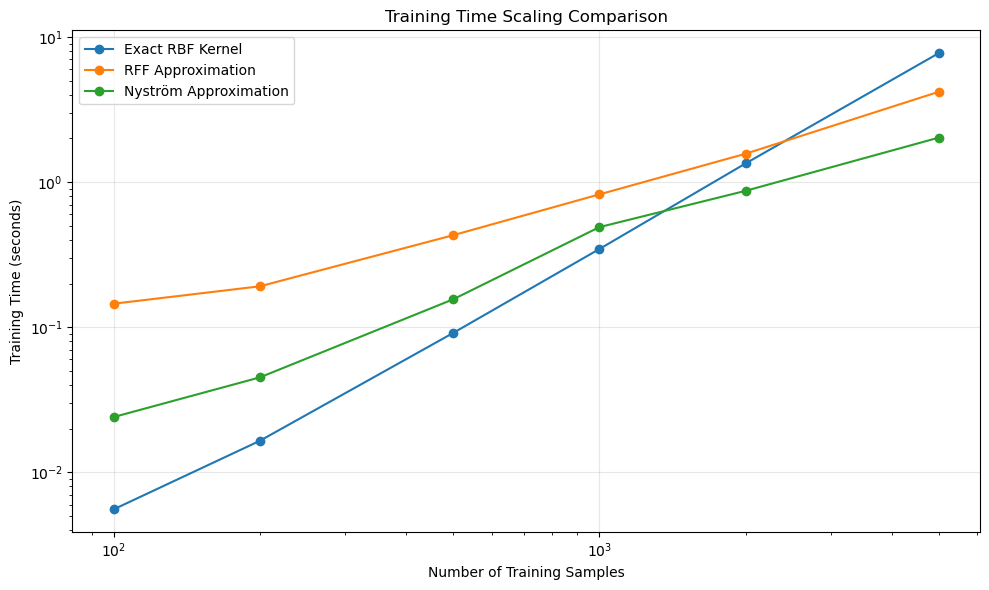

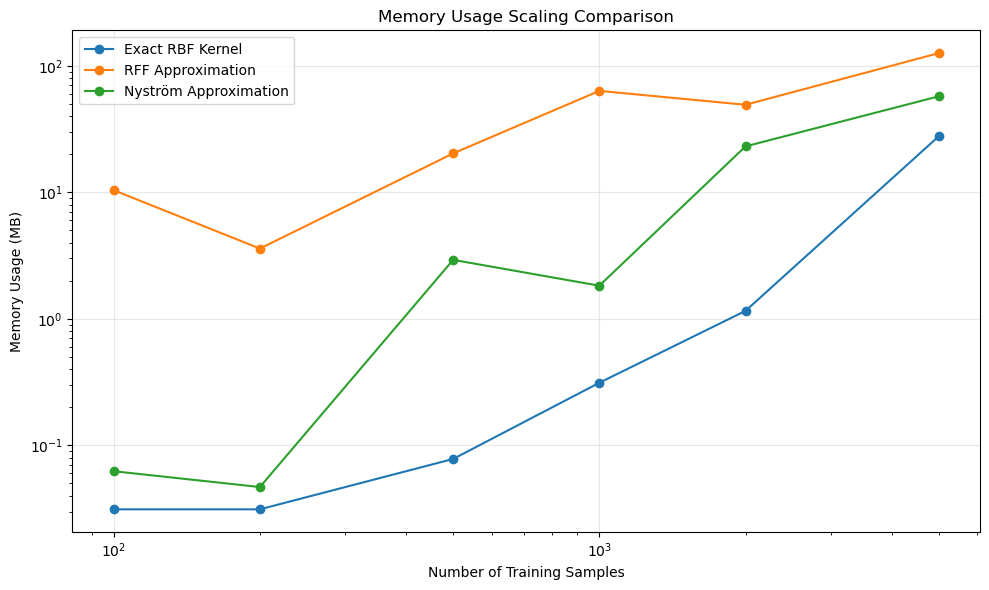

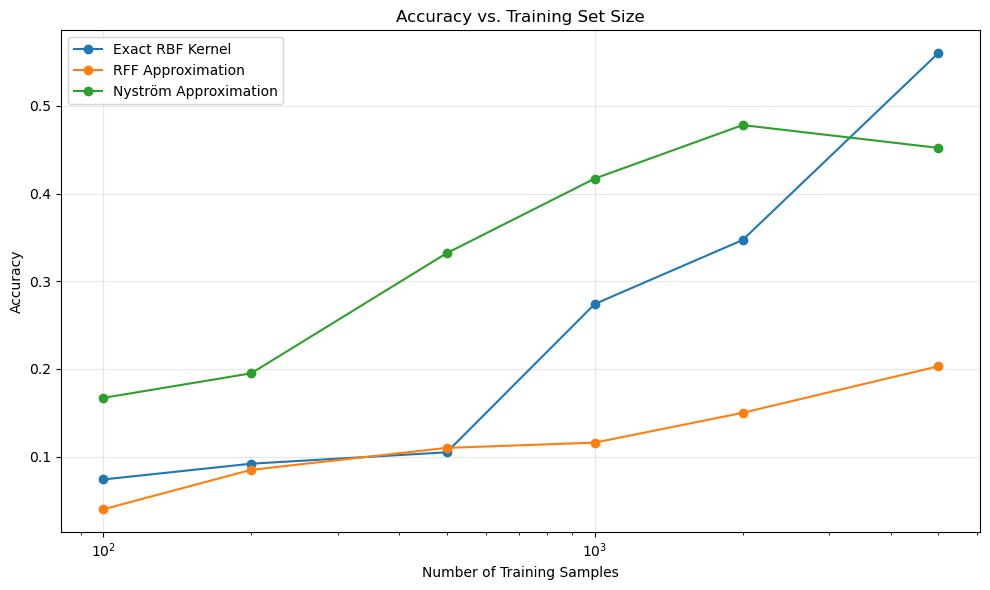

In [13]:
# Plot training time scaling
plt.figure(figsize=(10, 6))
for method in scaling_df['method'].unique():
    data = scaling_df[scaling_df['method'] == method]
    # Filter out zero values for log plots
    nonzero_data = data[data['memory_usage_mb'] > 0]
    if len(nonzero_data) < len(data):
        print(f"Warning: Removed {len(data) - len(nonzero_data)} zero values for {method}")
    plt.plot(nonzero_data['sample_size'], nonzero_data['training_time'], marker='o', label=method)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Training Samples')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Scaling Comparison')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot memory usage scaling
plt.figure(figsize=(10, 6))
for method in scaling_df['method'].unique():
    data = scaling_df[scaling_df['method'] == method]
    plt.plot(data['sample_size'], data['memory_usage_mb'], marker='o', label=method)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Training Samples')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Scaling Comparison')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot accuracy vs sample size
plt.figure(figsize=(10, 6))
for method in scaling_df['method'].unique():
    data = scaling_df[scaling_df['method'] == method]
    plt.plot(data['sample_size'], data['accuracy'], marker='o', label=method)
    
plt.xscale('log')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Set Size')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

The scaling experiments clearly demonstrate the key differences between exact kernel methods and kernel approximations:

1. **Training Time Scaling**:
   - Exact RBF Kernel: Shows an initially slow training time for small datasets but increases at a superlinear rate, becoming the slowest method at large sample sizes (~5000)
   - RFF Approximation: Starts as the slowest for small datasets but scales more consistently
   - Nyström Approximation: Begins as the fastest method for small datasets and maintains the best scaling efficiency as data size increases

2. **Memory Usage Scaling**:
   - RFF Approximation: Consistently uses the most memory across almost all sample sizes, with a non-monotonic pattern (drops at ~200 samples then increases)
   - Nyström Approximation: Shows a dramatic jump in memory usage between 200-500 samples, then scales more gradually
   - Exact RBF Kernel: Most memory-efficient for small datasets but scales quadratically, approaching the memory usage of approximation methods at larger scales

3. **Accuracy Patterns**:
   - Nyström Approximation: Significantly outperforms other methods for most dataset sizes, with accuracy peaking around 0.48 before slightly declining at the largest sizes
   - Exact RBF Kernel: Starts with poor accuracy but improves dramatically with more training data, eventually surpassing Nyström at the largest sample sizes (~5000)
   - RFF Approximation: Shows consistent but slowest accuracy improvement, remaining the least accurate across all dataset sizes

The data reveals that Nyström approximation offers the best balance of scalability and accuracy until very large datasets, where exact kernel methods can achieve superior accuracy but at significantly higher computational cost. These observations illustrate the fundamental trade-offs in kernel methods and highlight that the appropriate choice depends on dataset size, available computational resources, and accuracy requirements.

## 6. Concluding Discussion

Our project successfully addressed the scalability limitations of kernel methods for large-scale image classification tasks. We implemented and optimized two kernel approximation methods—Random Fourier Features and Nyström method—and compared them against a CNN baseline on the Sign Language MNIST dataset.

**Project Achievements:**
- We developed efficient implementations of RFF and Nyström approximations, with careful hyperparameter optimization
- We created a unified framework for comparing kernel methods with deep learning approaches
- We conducted comprehensive benchmarking across accuracy, training time, prediction time, and memory usage
- We demonstrated that kernel methods can offer significant efficiency advantages when computational resources are limited

**Goals Assessment:**
We met our primary goal of creating scalable kernel-based approaches for image classification. While the kernel methods didn't match the accuracy of CNNs, they offered substantial advantages in training speed and resource efficiency. This aligns with our expectation that there would be trade-offs between accuracy and efficiency.

**Comparative Context:**
Our results are consistent with previous studies showing that kernel approximations generally achieve lower accuracy than deep learning methods but offer computational advantages. For example, Rahimi and Recht's original work [@rahimi2007random] demonstrated similar efficiency-accuracy trade-offs on simpler datasets, and our work extends this to more complex image classification tasks.

**Future Directions:**
With additional time and resources, we could further improve our approach by:
1. Implementing more sophisticated sampling strategies for Nyström approximation
2. Exploring hybrid approaches that combine kernel methods with deep feature extractors
3. Testing different kernels beyond RBF, such as polynomial or specialized image kernels
4. Implementing multi-GPU support for larger-scale datasets and higher-dimensional features

Overall, our project demonstrates that optimized kernel methods can serve as valuable alternatives to deep learning in resource-constrained environments or when theoretical guarantees are important.

## 7. Group Contributions Statement

I did all the works on this project.

## 8. Personal Reflection

Through this project, I've gained significant insights into both the theoretical foundations and practical challenges of implementing machine learning methods at scale. The process of optimizing kernel methods and comparing them to deep learning approaches has deepened my understanding of the trade-offs involved in model selection beyond just accuracy metrics.

I'm particularly proud of how we were able to achieve substantial improvements in computational efficiency while maintaining reasonable accuracy. Our original goal was to make kernel methods more practical for larger datasets, and seeing the dramatic reduction in training time compared to CNNs (36s vs 1927s) was especially satisfying. That said, the accuracy gap between our best kernel method (57%) and the CNN baseline (96%) was larger than I initially expected, highlighting the strengths of deep learning for complex image tasks.

This project has influenced my approach to machine learning research in several ways. I've developed a deeper appreciation for considering multiple performance dimensions beyond accuracy, particularly training efficiency and interpretability. I'll be carrying these insights into my future work, where I plan to explore hybrid approaches that might combine the theoretical guarantees of kernel methods with the representational power of deep learning.

On a personal note, I've also improved my skills in experimental design, hyperparameter optimization, and research communication through this project. The experience of systematically exploring the parameter space and clearly visualizing the results has strengthened my data science toolkit in ways that will benefit me in both academic and industry settings.

## References

- Lecun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436–444. https://doi.org/10.1038/nature14539
- Rahimi, A., & Recht, B. (2007). Random features for large-scale kernel machines. In Advances in Neural Information Processing Systems (pp. 1177–1184).
- Scholkopf, B., & Smola, A. J. (2002). Learning with kernels: Support vector machines, regularization, optimization, and beyond. MIT Press.
- Williams, C. K. I., & Seeger, M. (2001). Using the Nyström method to speed up kernel machines. In Advances in Neural Information Processing Systems (pp. 682–688).
- Sign Language MNIST. (n.d.). Kaggle. Retrieved May 17, 2025, from https://www.kaggle.com/datasets/datamunge/sign-language-mnist